# MultiGroupDirectLiNGAM

## Import and settings
In this example, we need to import `numpy`, `pandas`, and `graphviz` in addition to `lingam`.

In [1]:
import numpy as np
import pandas as pd
import graphviz
import lingam
from lingam.utils import print_causal_directions, print_dagc, make_dot

print([np.__version__, pd.__version__, graphviz.__version__, lingam.__version__])

np.set_printoptions(precision=3, suppress=True)
np.random.seed(0)

['1.16.2', '0.24.2', '0.11.1', '1.4.0']


## Test data
We generate two datasets consisting of 6 variables.

In [2]:
x3 = np.random.uniform(size=10000)
x0 = 3.0*x3 + np.random.uniform(size=10000)
x2 = 6.0*x3 + np.random.uniform(size=10000)
x1 = 3.0*x0 + 2.0*x2 + np.random.uniform(size=10000)
x5 = 4.0*x0 + np.random.uniform(size=10000)
x4 = 8.0*x0 - 1.0*x2 + np.random.uniform(size=10000)
X1 = pd.DataFrame(np.array([x0, x1, x2, x3, x4, x5]).T ,columns=['x0', 'x1', 'x2', 'x3', 'x4', 'x5'])
X1.head()

,x0,x1,x2,x3,x4,x5
0,2.394708,15.312359,3.685054,0.548814,15.780259,9.948090
1,2.325771,16.145216,4.332293,0.715189,14.335879,9.514409
2,2.197313,15.848718,4.539881,0.602763,14.027410,9.266158
3,1.672250,13.200354,3.675534,0.544883,10.421554,6.771233
4,1.282752,11.337503,3.486211,0.423655,7.533376,5.368668


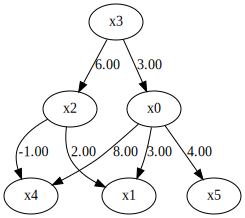

In [3]:
m = np.array([[0.0, 0.0, 0.0, 3.0, 0.0, 0.0],
              [3.0, 0.0, 2.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 6.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [8.0, 0.0,-1.0, 0.0, 0.0, 0.0],
              [4.0, 0.0, 0.0, 0.0, 0.0, 0.0]])

make_dot(m)

In [4]:
x3 = np.random.uniform(size=1000)
x0 = 3.5*x3 + np.random.uniform(size=1000)
x2 = 6.5*x3 + np.random.uniform(size=1000)
x1 = 3.5*x0 + 2.5*x2 + np.random.uniform(size=1000)
x5 = 4.5*x0 + np.random.uniform(size=1000)
x4 = 8.5*x0 - 1.5*x2 + np.random.uniform(size=1000)
X2 = pd.DataFrame(np.array([x0, x1, x2, x3, x4, x5]).T ,columns=['x0', 'x1', 'x2', 'x3', 'x4', 'x5'])
X2.head()

,x0,x1,x2,x3,x4,x5
0,3.848617,29.790327,6.151635,0.927955,23.683228,17.497765
1,3.765482,28.839731,5.981344,0.902937,23.362070,17.126491
2,1.613042,13.637872,2.930467,0.427617,9.871720,7.578267
3,1.838085,16.640591,3.715235,0.510806,10.427863,9.068131
4,2.321607,19.614986,4.540952,0.583200,13.276292,11.184535


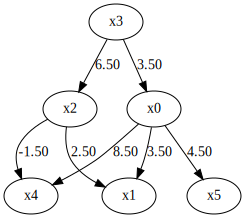

In [5]:
m = np.array([[0.0, 0.0, 0.0, 3.5, 0.0, 0.0],
              [3.5, 0.0, 2.5, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 6.5, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [8.5, 0.0,-1.5, 0.0, 0.0, 0.0],
              [4.5, 0.0, 0.0, 0.0, 0.0, 0.0]])

make_dot(m)

We create a list variable that contains two datasets.

In [6]:
X_list = [X1, X2]

## Causal Discovery
To run causal discovery for multiple datasets, we create a `MultiGroupDirectLiNGAM` object and call the `fit` method.

In [7]:
model = lingam.MultiGroupDirectLiNGAM()
model.fit(X_list)

Using the `causal_order_` properties, we can see the causal ordering as a result of the causal discovery.

In [8]:
model.causal_order_

[3, 2, 0, 1, 5, 4]

Also, using the `adjacency_matrix_` properties, we can see the adjacency matrix as a result of the causal discovery. As you can see from the following, DAG in each dataset is correctly estimated.

[[ 0.     0.     0.     3.006  0.     0.   ]
 [ 3.002  0.     1.996  0.     0.     0.   ]
 [ 0.     0.     0.     6.001  0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.   ]
 [ 7.978  0.    -0.988  0.     0.     0.   ]
 [ 3.998  0.     0.     0.     0.     0.   ]]


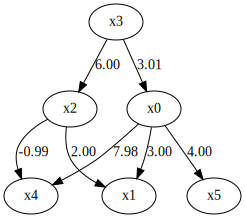

In [9]:
print(model.adjacency_matrices_[0])
make_dot(model.adjacency_matrices_[0])

[[ 0.     0.     0.043  3.245  0.     0.   ]
 [ 3.508  0.     2.491  0.     0.     0.   ]
 [ 0.     0.     0.     6.481  0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.   ]
 [ 7.519  0.    -0.942  0.     0.     0.   ]
 [ 4.422  0.     0.     0.     0.     0.   ]]


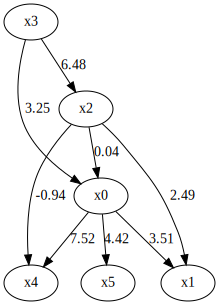

In [10]:
print(model.adjacency_matrices_[1])
make_dot(model.adjacency_matrices_[1])

To compare, we run DirectLiNGAM with single dataset concatenating two datasets.

In [11]:
X_all = pd.concat([X1, X2])
print(X_all.shape)

(11000, 6)


In [12]:
model_all = lingam.DirectLiNGAM()
model_all.fit(X_all)

model_all.causal_order_

[3, 4, 5, 2, 1, 0]

You can see that the causal structure cannot be estimated correctly for a single dataset.

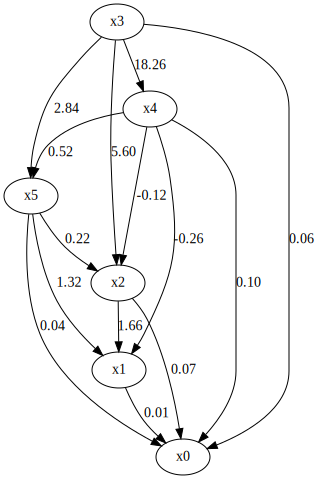

In [13]:
make_dot(model_all.adjacency_matrix_)

## Bootstrapping
In `MultiGroupDirectLiNGAM`, bootstrap can be executed in the same way as normal `DirectLiNGAM`.

In [14]:
results = model.bootstrap(X_list, n_sampling=100)

The `bootstrap` method returns a list of multiple `BootstrapResult`, so we can get the result of bootstrapping from the list. We can get the same number of results as the number of datasets, so we specify an index when we access the results. We can get the ranking of the causal directions extracted by `get_causal_direction_counts()`.

In [15]:
cdc = results[0].get_causal_direction_counts(n_directions=8, min_causal_effect=0.01)
print_causal_directions(cdc, 100)

x0 <--- x3  (100.0%)
x1 <--- x0  (100.0%)
x1 <--- x2  (100.0%)
x2 <--- x3  (100.0%)
x4 <--- x0  (100.0%)
x4 <--- x2  (100.0%)
x5 <--- x0  (100.0%)
x0 <--- x2  (14.0%)


In [16]:
cdc = results[1].get_causal_direction_counts(n_directions=8, min_causal_effect=0.01)
print_causal_directions(cdc, 100)

x0 <--- x3  (100.0%)
x1 <--- x0  (100.0%)
x1 <--- x2  (100.0%)
x1 <--- x3  (100.0%)
x5 <--- x0  (100.0%)
x2 <--- x3  (100.0%)
x5 <--- x3  (100.0%)
x4 <--- x0  (100.0%)


Also, using the `get_directed_acyclic_graph_counts()` method, we can get the ranking of the DAGs extracted. In the following sample code, `n_dags` option is limited to the dags of the top 3 rankings, and `min_causal_effect` option is limited to causal directions with a coefficient of 0.01 or more.

In [17]:
dagc = results[0].get_directed_acyclic_graph_counts(n_dags=3, min_causal_effect=0.01)
print_dagc(dagc, 100)

DAG[0]: 75.0%
	x0 <--- x3 
	x1 <--- x0 
	x1 <--- x2 
	x2 <--- x3 
	x4 <--- x0 
	x4 <--- x2 
	x5 <--- x0 
DAG[1]: 14.0%
	x0 <--- x2 
	x0 <--- x3 
	x1 <--- x0 
	x1 <--- x2 
	x2 <--- x3 
	x4 <--- x0 
	x4 <--- x2 
	x5 <--- x0 
DAG[2]: 6.0%
	x0 <--- x3 
	x1 <--- x0 
	x1 <--- x2 
	x1 <--- x3 
	x2 <--- x3 
	x4 <--- x0 
	x4 <--- x2 
	x5 <--- x0 


In [18]:
dagc = results[1].get_directed_acyclic_graph_counts(n_dags=3, min_causal_effect=0.01)
print_dagc(dagc, 100)

DAG[0]: 13.0%
	x0 <--- x3 
	x1 <--- x0 
	x1 <--- x2 
	x1 <--- x3 
	x1 <--- x5 
	x2 <--- x3 
	x4 <--- x0 
	x4 <--- x2 
	x4 <--- x3 
	x4 <--- x5 
	x5 <--- x0 
	x5 <--- x2 
	x5 <--- x3 
DAG[1]: 6.0%
	x0 <--- x3 
	x1 <--- x0 
	x1 <--- x2 
	x1 <--- x3 
	x1 <--- x5 
	x2 <--- x3 
	x4 <--- x0 
	x4 <--- x2 
	x4 <--- x3 
	x5 <--- x0 
	x5 <--- x2 
	x5 <--- x3 
DAG[2]: 5.0%
	x0 <--- x3 
	x1 <--- x0 
	x1 <--- x2 
	x1 <--- x3 
	x1 <--- x5 
	x2 <--- x3 
	x2 <--- x5 
	x4 <--- x0 
	x4 <--- x2 
	x4 <--- x3 
	x4 <--- x5 
	x5 <--- x0 
	x5 <--- x3 


Using the `get_causal_effects()` method, we can get the list of causal effect. The causal effects we can get are dictionary type variable.
We can display the list nicely by assigning it to pandas.DataFrame. Also, we have replaced the variable index with a label below.

In [19]:
causal_effects = results[0].get_causal_effects(min_causal_effect=0.01)
df = pd.DataFrame(causal_effects)

labels = [f'x{i}' for i in range(X1.shape[1])]
df['from'] = df['from'].apply(lambda x : labels[x])
df['to'] = df['to'].apply(lambda x : labels[x])
df

,from,to,effect,probability
0,x3,x0,3.353267,1.00
1,x0,x1,3.442895,1.00
2,x2,x1,2.461294,1.00
3,x3,x2,6.456006,1.00
4,x0,x4,8.265804,1.00
5,x2,x4,-1.434897,1.00
6,x0,x5,4.452274,1.00
7,x2,x0,0.053657,0.45
8,x5,x4,0.056959,0.28
9,x3,x1,0.162262,0.14


We can easily perform sorting operations with pandas.DataFrame.

In [20]:
df.sort_values('effect', ascending=False).head()

,from,to,effect,probability
4,x0,x4,8.265804,1.0
3,x3,x2,6.456006,1.0
6,x0,x5,4.452274,1.0
1,x0,x1,3.442895,1.0
0,x3,x0,3.353267,1.0


And with pandas.DataFrame, we can easily filter by keywords. The following code extracts the causal direction towards x1.

In [21]:
df[df['to']=='x1'].head()

,from,to,effect,probability
1,x0,x1,3.442895,1.00
2,x2,x1,2.461294,1.00
9,x3,x1,0.162262,0.14
10,x5,x1,0.069534,0.06


Because it holds the raw data of the causal effect (the original data for calculating the median), it is possible to draw a histogram of the values of the causal effect, as shown below.

(array([ 4.,  2.,  6.,  5.,  8., 16., 12.,  5., 25., 17.]),
 array([2.819, 2.899, 2.978, 3.058, 3.137, 3.217, 3.296, 3.376, 3.455,
        3.535, 3.614]),
 <a list of 10 Patch objects>)

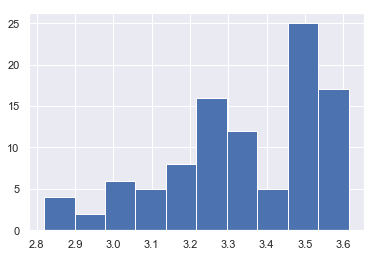

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

from_index = 3
to_index = 0
plt.hist(results[0].total_effects_[:, to_index, from_index])